#Mixed data and multiple inputs
###Predict the Laoding value

This is a Regression problem, but the model has 2 branches to embed the solute id and mof_id and then with temperature the input is concatenated to pass it to the dense block to predict the loading value

In [ ]:
# importing all the necessary ,libraries 
import tensorflow as tf
import keras as kr
import pandas as pd
import xlrd as xl
import numpy as np


In [ ]:
data_final = pd.read_csv('/content/Data_final.csv', sep= ';')
data_final.head()

#################################################################################################################

# mof_ID # Solute_ID # Tempearture normalised # laoding value
#    1   #   1       #   0.30                 # 17
#    1   #   2       #   0.31                 # 18
#    4   #   3       #   0.23                 # 1
#    1   #   4       #   0.34                 # 1.7
#    2   #   3       #   0.17                 # 2.21


,MOF,SOLUTE,temperature,MOF_ID,SOLUTE_ID,Loading_value,temp_normalise
0,((Me2NH2)In(NH2BDC)2),carbon dioxide,273,1,1,2.12,0.29
1,((Me2NH2)In(NH2BDC)2),carbon dioxide,298,1,1,2.31,0.20
2,((Me2NH2)In(NH2BDC)2),nitrogen,77,1,2,7.06,1.00
3,([Co@Zn3(L)(H2L)(DMF)(DABCO)],carbon dioxide,273,2,1,5.35,0.29
4,([Co@Zn3(L)(H2L)(DMF)(DABCO)],nitrogen,77,2,2,8.80,1.00


# Building keras RS model

In [ ]:
import keras
from keras.layers import Input
from keras.models import Model
from keras.layers import Concatenate
from keras.layers import Embedding, Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Embedding, merge
from keras.layers import concatenate



In [23]:
input_MOF = Input(shape=(1,))
input_solute = Input(shape=(1,))
input_temp = Input(shape=(1,))

#Embedding the mof id into a tensor of shape (1,10)
x1  = Embedding(data_final["MOF_ID"].max() +1, 100, input_length=1)(input_MOF)
x1_flatten= Flatten()(x1)
#x2  =Dense(50, activation="relu")(x1_flatten)
x3  =Dense(10, activation="relu")(x1_flatten)

Embeddings_MOF = Model(inputs= input_MOF,outputs=x3)


#Embedding the solute id into a tensor of shape (1,10)

x2  = Embedding(data_final["SOLUTE_ID"].max()+1, 10, input_length=1)(input_solute)
x2_flatten = Flatten()(x2)
Embeddings_solute = Model(inputs= input_solute,outputs=x2_flatten)




#Concat the two embeddings and the temperature to make it (1,21) vector 
combined = concatenate([Embeddings_MOF.output, Embeddings_solute.output,input_temp])

#Dense blokc at the end so that the concatenated vector is made smaller to (1,1) 
#z = Dense(10, activation="relu")(combined)
z_out = Dense(1, activation="relu")(combined)
# our model will accept the inputs of the two branches and the temperature value
# then output a single value
model = Model(inputs=[Embeddings_MOF.input, Embeddings_solute.input,input_temp], outputs=z_out)





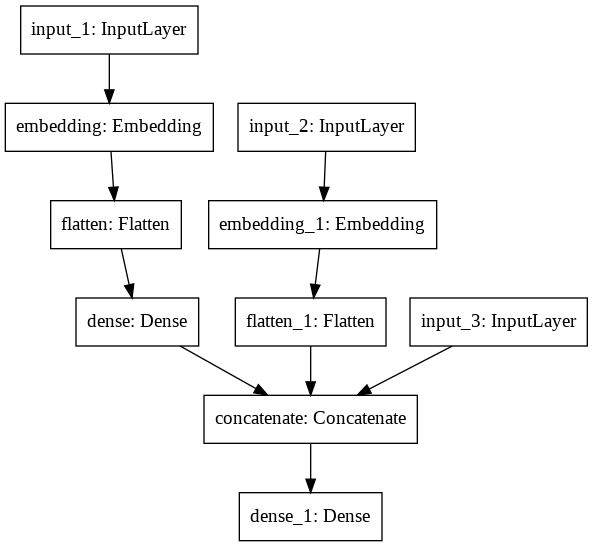

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file = "model.png")

In [ ]:
#Divide the data in 75% training and rest 25% testing 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_final[["MOF_ID","SOLUTE_ID","temp_normalise"]], data_final["Loading_value"], test_size=0.25, random_state=42)

In [33]:
model.compile(loss='mean_absolute_error',
    metrics=[tf.keras.metrics.MeanAbsoluteError()],
                optimizer=tf.keras.optimizers.Adam(0.01))

In [34]:
model.fit(x= [[X_train["MOF_ID"]],[X_train["SOLUTE_ID"]],[X_train["temp_normalise"]]],y=y_train,epochs=50, batch_size=100,validation_data=([X_test["MOF_ID"],X_test["SOLUTE_ID"],X_test["temp_normalise"]],y_test))

Epoch 1/50
51/51 [==============================] - 1s 9ms/step - loss: 9.3666 - mean_absolute_error: 9.3666 - val_loss: 8.0821 - val_mean_absolute_error: 8.0821
Epoch 2/50
51/51 [==============================] - 0s 6ms/step - loss: 8.4320 - mean_absolute_error: 8.4320 - val_loss: 7.9337 - val_mean_absolute_error: 7.9337
Epoch 3/50
51/51 [==============================] - 0s 6ms/step - loss: 6.1554 - mean_absolute_error: 6.1554 - val_loss: 8.1021 - val_mean_absolute_error: 8.1021
Epoch 4/50
51/51 [==============================] - 0s 6ms/step - loss: 6.0877 - mean_absolute_error: 6.0877 - val_loss: 8.2182 - val_mean_absolute_error: 8.2182
Epoch 5/50
51/51 [==============================] - 0s 6ms/step - loss: 5.4098 - mean_absolute_error: 5.4098 - val_loss: 8.2628 - val_mean_absolute_error: 8.2628
Epoch 6/50
51/51 [==============================] - 0s 7ms/step - loss: 5.7504 - mean_absolute_error: 5.7504 - val_loss: 8.1879 - val_mean_absolute_error: 8.1879
Epoch 7/50
51/51 [==========

In [35]:
temp = tf.constant([[1.0]])


t_mof = tf.constant([[2]])

t_solute = tf.constant([[3]])

print(temp.shape,t_mof.shape,t_solute.shape)

(1, 1) (1, 1) (1, 1)


In [36]:
#predicting on the model trained

model([t_mof,t_solute,temp])

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[6.354291]], dtype=float32)>